In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Import NHL Team Data and Display
nhl_team=pd.read_csv("Data/NHL_team.csv")
nhl_team.head()
#Import NHL Competition Data and Display Head
nhl_comp=pd.read_csv("Data/NHL_competition.csv")
nhl_game = pd.read_csv("Data/NHL_game.csv")
#Import NHL PPPK Data and Display Head
nhl_pppk=pd.read_csv("Data/pp.pk.ppgf.csv")

## Steps
I. Data Coding and Merging

1. Import the “NHL_Team.csv” data file and name the dataframe as “NHL_Team” in Jupyter Notebook.
 - Delete the following variables: “Unnamed:0”, “abbr”, “tname”, “lname”, and “sname”.
 - Rename the variable “name” to “team_name”.

2. Import the “NHL_competition.csv” data file and name the dataframe as “NHL_Competition” in Jupyter Notebook.
 - Delete the following variables: “Unnamed: 0”, “tz”, “start”, and “end”
 - Rename the variable “name” to “competition_name”.

3. Import the “NHL_game.csv” data file and name the dataframe as “NHL_Game” in Jupyter Notebook.
 - Delete the following variables: “X”, “period”, and “status”.

4. Merge the dataframe “NHL_Team” into the dataframe “NHL_Game” by “tid.” Continue to name the merged dataframe as “NHL_Game.”

5. Merge the dataframe “NHL_Competition” into the dataframe “NHL_Game” by “comp_id.” Continue to name the merged dataframe as “NHL_Game.”

6. In the merged “NHL_Game” dataframe, create a variable “hgd” to indicate the goal difference between home and away score (hscore – ascore) and delete observations with missing value in the variable “hgd”.

7. Drop all observations with missing values, if there is still any, from the “NHL_Game” dataframe.

8. Convert the type of the “date” variable from “object” to “datetime.”

9. Sort the NHL games by “date” and show the first 15 observations.

10. Create two dataframes that separate the “NHL_Game” dataframe by home and away games. Name them “NHL_Home” and “NHL_Away”, respectively.
    - Rename variables:
      - For away games, rename “ascore” to “goals_for”; rename “hscore” to “goals_against”
      - For home games, rename “hscore” to “goals_for”; rename “ascore” to “goals_against” 
    - Create a “win” variable that equals to 1 if the team won the game; 0 if the team lost the game; and 0.5 if it was a draw. 

11. Append the “NHL_Home” and “NHL_Away” dataframes to be the new “NHL_Game” dataframe.

12. Generate a team level dataframe that aggregates the total number of games won, the total number of “goals_for” and “goals_against” for each team in each competition (i.e. grouped by tid, competition_name and type). Name this new dataframe “NHL_Team_Stats”. Make sure to convert the indexes of the new dataframe back as  variables. 

13. Create a dataframe “NHL_Game_Count” that include the total number of games played by each team in each competition (i.e. grouped by tid, competition_name and type). Name this new variable in the dataframe “game_count”.

14. Merge dataframes.
    - Merge the “NHL_Game_Count” dataframe into the “NHL_Team_Stats” dataframe by “tid”, “competition_name”, and “type”. Continue to name the merged dataframe “NHL_Team_Stats”.
    - Merge the “NHL_Team” dataframe into the “NHL_Team_Stats” dataframe by “tid”. Continue to name the merged dataframe “NHL_Team_Stats”.

15. Import the “pp.pk.ppgf.csv” data file and name the dataframe as “NHL_PPPK” in Jupyter Notebook. Merge the “NHL_PPPK” dataframe into the “NHL_Team_Stats” dataframe by “tricode” and “competition_name”.

16. Create new variables in the “NHL_Team_Stats” dataframe.
    - Winning percentage (“win_pct”)=”win”/ total number of games played
    - Average goals for per game (“avg_gf”)=total number of goals for / total number of games played     
    - Average goals against per game (“avg_ga”)=total number of goals against / total number of games played

17. In the “NHL_Competition” dataframe, the variable “type” indicates the type of competition: type=2 – regular season. Create a dataframe that contains team statistics for games only during regular seasons. Name this dataframe “NHL_Team_R_Stats”. 

In [3]:
cols_to_drop = ["Unnamed: 0", "abbr", "tname", "lname", "sname"]
nhl_team.drop(columns=cols_to_drop, inplace=True, errors="ignore")
nhl_team.rename(columns={"name": "team_name"}, inplace=True)
nhl_team.head()

,tid,team_name,tricode
0,1,Toronto Maple Leafs,TOR
1,2,Montréal Canadiens,MTL
2,4,Winnipeg Jets,WPG
3,5,Washington Capitals,WSH
4,6,Chicago Blackhawks,CHI


In [4]:
cols_to_drop = ["Unnamed: 0", "tz", "start", "end"]
nhl_comp.drop(columns=cols_to_drop, inplace=True, errors="ignore")
nhl_comp.rename(columns={"name": "competition_name"}, inplace=True)
nhl_comp.head()

,comp_id,year,type,competition_name
0,1,2013,2,2013 NHL Regular Season
1,2,2017,2,2017 NHL Regular Season
2,2453,2013,3,2013 NHL Playoff
3,2541,2017,3,2017 NHL Playoff
4,2661,2012,2,2012 NHL Regular Season


In [5]:
cols_to_drop = ["X", "period", "status"]
nhl_game.drop(columns=cols_to_drop, inplace=True)
nhl_game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid
0,37,2,10/7/2017,NaN,NaN,away,25
1,67,2,10/9/2017,NaN,NaN,away,29
2,154,1,10/14/2013,NaN,NaN,away,29
3,278,1,10/24/2013,NaN,NaN,away,53
4,291,1,10/25/2013,NaN,NaN,away,5


In [6]:
nhl_game = pd.merge(nhl_game, nhl_team, on="tid")
nhl_game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
2,2550,2541,4/23/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
3,2649,2541,5/8/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL
4,3304,2661,3/6/2013,NaN,NaN,away,25,Tampa Bay Lightning,TBL


In [7]:
nhl_game = pd.merge(nhl_game, nhl_comp, on="comp_id")
nhl_game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name
0,37,2,10/7/2017,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
1,1623,2,2/6/2018,NaN,NaN,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season


In [8]:
# step 6
nhl_game["hgd"] = nhl_game.hscore - nhl_game.ascore
nhl_game = nhl_game[nhl_game.hgd.notnull()]
nhl_game.head()

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
2,981,2,12/15/2017,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0
3,1607,2,2/4/2018,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0
4,2403,2,3/30/2018,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0
5,1541,2,1/31/2018,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0
6,1243,2,1/5/2018,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0


In [9]:
# step 7
nhl_game.dropna(inplace=True)
nhl_game.shape

(18506, 13)

In [10]:
# step 8
nhl_game["date"] = pd.to_datetime(nhl_game['date'])
nhl_game["date"].head()

2   2017-12-15
3   2018-02-04
4   2018-03-30
5   2018-01-31
6   2018-01-05
Name: date, dtype: datetime64[ns]

In [11]:
nhl_game["date"].describe()

/tmp/ipykernel_873355/3252973669.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nhl_game["date"].describe()


count                   18506
unique                   1607
top       2018-01-26 00:00:00
freq                       30
first     2010-10-07 00:00:00
last      2018-06-08 00:00:00
Name: date, dtype: object

In [12]:
# step 9
nhl_game.sort_values(by="date", ascending=True).head(15)

,gid,comp_id,date,ascore,hscore,home_away,tid,team_name,tricode,year,type,competition_name,hgd
8424,5666,5662,2010-10-07,4.0,3.0,away,66,Carolina Hurricanes,CAR,2010,2,2010 NHL Regular Season,-1.0
9944,5664,5662,2010-10-07,3.0,2.0,home,8,Pittsburgh Penguins,PIT,2010,2,2010 NHL Regular Season,-1.0
9006,5664,5662,2010-10-07,3.0,2.0,away,14,Philadelphia Flyers,PHI,2010,2,2010 NHL Regular Season,-1.0
9125,5666,5662,2010-10-07,4.0,3.0,home,35,Minnesota Wild,MIN,2010,2,2010 NHL Regular Season,-1.0
8814,5662,5662,2010-10-07,2.0,3.0,home,1,Toronto Maple Leafs,TOR,2010,2,2010 NHL Regular Season,1.0
8697,5662,5662,2010-10-07,2.0,3.0,away,2,Montréal Canadiens,MTL,2010,2,2010 NHL Regular Season,1.0
9742,5672,5662,2010-10-08,3.0,2.0,away,16,San Jose Sharks,SJS,2010,2,2010 NHL Regular Season,-1.0
9546,5681,5662,2010-10-08,2.0,1.0,home,32,Ottawa Senators,OTT,2010,2,2010 NHL Regular Season,-1.0
8975,5679,5662,2010-10-08,0.0,4.0,home,18,Detroit Red Wings,DET,2010,2,2010 NHL Regular Season,4.0
10004,5668,5662,2010-10-08,3.0,4.0,away,6,Chicago Blackhawks,CHI,2010,2,2010 NHL Regular Season,1.0


In [13]:
# step 10
nhl_home = nhl_game[nhl_game.home_away == "home"]
nhl_home.rename(columns={"hscore": "goals_for", "ascore": "goals_against"}, inplace=True)
nhl_away = nhl_game[nhl_game.home_away == "away"]
nhl_away.rename(columns={"hscore": "goals_against", "ascore": "goals_for"}, inplace=True)
nhl_home["win"] = np.where(nhl_home["hgd"] > 0, 1, np.where(nhl_home["hgd"] == 0, 0.5, 0))
nhl_away["win"] = np.where(nhl_away["hgd"] < 0, 1, np.where(nhl_away["hgd"] == 0, 0.5, 0))
display(nhl_home.head())
display(nhl_away.head())

/tmp/ipykernel_873355/3079794044.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_home.rename(columns={"hscore": "goals_for", "ascore": "goals_against"}, inplace=True)
/tmp/ipykernel_873355/3079794044.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_away.rename(columns={"hscore": "goals_against", "ascore": "goals_for"}, inplace=True)
/tmp/ipykernel_873355/3079794044.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0


,gid,comp_id,date,goals_for,goals_against,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
2,981,2,2017-12-15,4.0,1.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,1.0
3,1607,2,2018-02-04,4.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-2.0,1.0
4,2403,2,2018-03-30,7.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-4.0,1.0
5,1541,2,2018-01-31,1.0,3.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,2.0,0.0
6,1243,2,2018-01-05,1.0,2.0,away,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,0.0


In [14]:
# step 11
nhl_game = pd.concat([nhl_home, nhl_away])
nhl_game.head()

,gid,comp_id,date,goals_against,goals_for,home_away,tid,team_name,tricode,year,type,competition_name,hgd,win
41,2254,2,2018-03-20,3.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
42,2050,2,2018-03-07,4.0,5.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
43,844,2,2017-12-06,2.0,6.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,4.0,1.0
44,659,2,2017-11-23,2.0,3.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,1.0,1.0
45,2147,2,2018-03-13,7.0,4.0,home,25,Tampa Bay Lightning,TBL,2017,2,2017 NHL Regular Season,-3.0,0.0


In [15]:
# step 12
nhl_team_stats = nhl_game.groupby(["tid", "competition_name", "type"])["win", "goals_against", "goals_for"].sum()
nhl_team_stats.reset_index(inplace=True)
nhl_team_stats

/tmp/ipykernel_873355/1808521200.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  nhl_team_stats = nhl_game.groupby(["tid", "competition_name", "type"])["win", "goals_against", "goals_for"].sum()


,tid,competition_name,type,win,goals_against,goals_for
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0
2,1,2012 NHL Playoff,3,3.0,22.0,18.0
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0
...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,228.0,191.0
365,66,2015 NHL Regular Season,2,34.0,226.0,195.0
366,66,2016 NHL Regular Season,2,35.5,243.0,219.0
367,66,2017 NHL Regular Season,2,35.5,248.0,227.0


In [16]:
# steps 13
nhl_game_count_series = nhl_game.groupby(["tid", "competition_name", "type"])["gid"].count()
nhl_game_count = pd.DataFrame(nhl_game_count_series)
nhl_game_count.reset_index(inplace=True)
nhl_game_count.rename(columns={"gid": "game_count"}, inplace=True)
nhl_game_count

,tid,competition_name,type,game_count
0,1,2010 NHL Regular Season,2,82
1,1,2011 NHL Regular Season,2,40
2,1,2012 NHL Playoff,3,7
3,1,2012 NHL Regular Season,2,46
4,1,2013 NHL Regular Season,2,79
...,...,...,...,...
364,66,2014 NHL Regular Season,2,82
365,66,2015 NHL Regular Season,2,81
366,66,2016 NHL Regular Season,2,82
367,66,2017 NHL Regular Season,2,80


In [17]:
# steps 14
nhl_team_stats = pd.merge(nhl_team_stats, nhl_game_count, on=["tid", "competition_name", "type"])
nhl_team_stats = pd.merge(nhl_team_stats, nhl_team, on="tid")
nhl_team_stats

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR
2,1,2012 NHL Playoff,3,3.0,22.0,18.0,7,Toronto Maple Leafs,TOR
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0,46,Toronto Maple Leafs,TOR
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR
...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,228.0,191.0,82,Carolina Hurricanes,CAR
365,66,2015 NHL Regular Season,2,34.0,226.0,195.0,81,Carolina Hurricanes,CAR
366,66,2016 NHL Regular Season,2,35.5,243.0,219.0,82,Carolina Hurricanes,CAR
367,66,2017 NHL Regular Season,2,35.5,248.0,227.0,80,Carolina Hurricanes,CAR


In [18]:
# steps 15
nhl_team_stats = pd.merge(nhl_team_stats, nhl_pppk, on=["tricode", "competition_name"])
nhl_team_stats.head()

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode,pp,pk,ppgf
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR,368,426,46.0
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0
2,1,2012 NHL Playoff,3,3.0,22.0,18.0,7,Toronto Maple Leafs,TOR,30,29,5.0
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0,46,Toronto Maple Leafs,TOR,234,230,39.0
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR,362,342,61.0


In [19]:
# steps 16
nhl_team_stats["win_pct"] = nhl_team_stats.win / nhl_team_stats.game_count
nhl_team_stats["avg_gf"] = nhl_team_stats.goals_for / nhl_team_stats.game_count
nhl_team_stats["avg_ga"] = nhl_team_stats.goals_against / nhl_team_stats.game_count
nhl_team_stats

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
2,1,2012 NHL Playoff,3,3.0,22.0,18.0,7,Toronto Maple Leafs,TOR,30,29,5.0,0.428571,2.571429,3.142857
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,228.0,191.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,226.0,195.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,243.0,219.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,248.0,227.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


In [20]:
nhl_team_stats["win_pct"].describe()

count    369.000000
mean       0.472158
std        0.134584
min        0.000000
25%        0.406667
50%        0.500000
75%        0.562500
max        0.800000
Name: win_pct, dtype: float64

In [21]:
# steps 17
nhl_team_reg_season_stats = nhl_team_stats[nhl_team_stats.type == 2]
nhl_team_reg_season_stats.head()

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,258.0,209.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692


## Part 2 - Descriptive and Summary Analyses

In [22]:
#nba_games["FG_PCT"].describe()
nhl_game["goals_for"].describe()

count    18506.000000
mean         2.825894
std          1.654729
min          0.000000
25%          2.000000
50%          3.000000
75%          4.000000
max         10.000000
Name: goals_for, dtype: float64

In [23]:
nhl_home["goals_against"].describe()

count    9253.000000
mean        2.689830
std         1.608916
min         0.000000
25%         1.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_against, dtype: float64

In [24]:
nhl_away["goals_against"].describe()

count    9253.000000
mean        2.961958
std         1.688463
min         0.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        10.000000
Name: goals_against, dtype: float64

In [25]:
nhl_game.groupby(["home_away"])["goals_against"].describe()

,count,mean,std,min,25%,50%,75%,max
home_away,,,,,,,,
away,9253.0,2.961958,1.688463,0.0,2.0,3.0,4.0,10.0
home,9253.0,2.689830,1.608916,0.0,1.0,3.0,4.0,10.0


array([<AxesSubplot:title={'center':'away'}>,
       <AxesSubplot:title={'center':'home'}>], dtype=object)

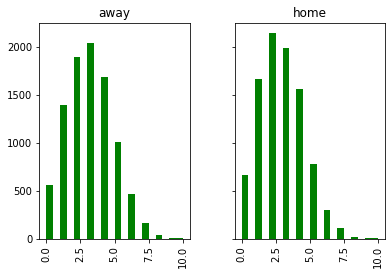

In [26]:
nhl_game.hist(by="home_away", column="goals_against", color="green", bins=20, sharex=True, sharey=True)

## Part 3 - Correlation Analyses

1. In the “NHL_Team_R_Stats” dataframe, make a scatter plot to depict the relationship between the total number of goals for and the winning percentage. 
    - Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
    - Add a regression line to the scatter plot.
    - Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
    - Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.
    

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

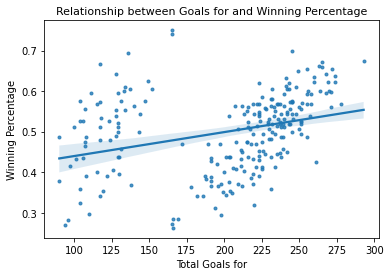

In [27]:
sns.regplot(x="goals_for", y="win_pct", data=nhl_team_reg_season_stats, marker=".")
plt.xlabel("Total Goals for")
plt.ylabel("Winning Percentage")
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

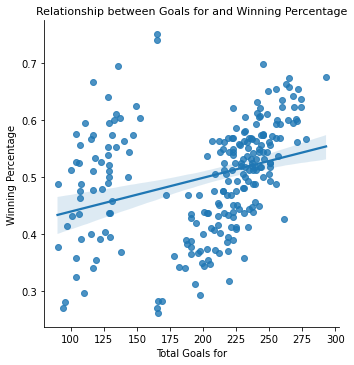

In [28]:
sns.lmplot(x='goals_for', y='win_pct', data=nhl_team_reg_season_stats)
plt.xlabel("Total Goals for")
plt.ylabel("Winning Percentage")
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

2. In the “NHL_Team_R_Stats” dataframe, calculate the correlation coefficient between total number of goals for and winning percentage.

In [29]:
nhl_team_reg_season_stats["win_pct"].corr(nhl_team_reg_season_stats["goals_for"])

0.31566456280848143

In [30]:
nhl_team_reg_season_stats

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
1,1,2011 NHL Regular Season,2,20.0,129.0,129.0,40,Toronto Maple Leafs,TOR,192,182,36.0,0.500000,3.225000,3.225000
3,1,2012 NHL Regular Season,2,25.0,129.0,144.0,46,Toronto Maple Leafs,TOR,234,230,39.0,0.543478,3.130435,2.804348
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,258.0,209.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,228.0,191.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,226.0,195.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,243.0,219.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,248.0,227.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


3. Create a scatter plot of the total number of goals for and winning percentage similar to step 1 for regular season games. In this graph, group observations by “competition_name”.
    - Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
    - Add a regression line to the scatter plot.
    - Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
    - Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

/home/daniel/python_virtualenv/sports_analytics/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharex is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)
/home/daniel/python_virtualenv/sports_analytics/lib/python3.8/site-packages/seaborn/regression.py:592: UserWarning: sharey is deprecated from the `lmplot` function signature. Please update your code to pass it using `facet_kws`.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

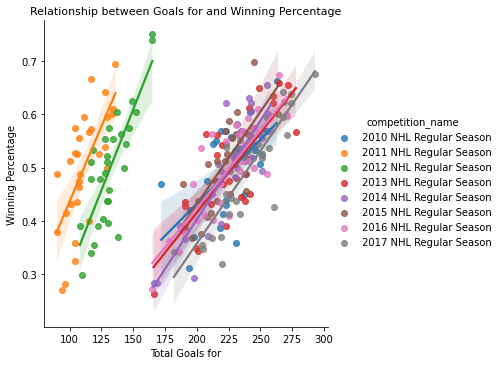

In [31]:
sns.lmplot(x="goals_for", y="win_pct", hue="competition_name", data=nhl_team_reg_season_stats, sharex=True, sharey=True)
plt.xlabel("Total Goals for")
plt.ylabel("Winning Percentage")
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

4. For the “NHL_Team_R_Stats” dataframe, delete observations of 2011 and 2012 seasons. Continue to name the dataframe “NHL_Team_R_Stats”.

In [32]:
nhl_team_reg_season_stats.drop(
    (nhl_team_reg_season_stats[nhl_team_reg_season_stats.competition_name == "2011 NHL Regular Season"].index) 
    |
    (nhl_team_reg_season_stats[nhl_team_reg_season_stats.competition_name == "2012 NHL Regular Season"].index),
    inplace=True
)

/tmp/ipykernel_873355/2324422191.py:2: FutureWarning: Index.__or__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__or__.  Use index.union(other) instead.
  (nhl_team_reg_season_stats[nhl_team_reg_season_stats.competition_name == "2011 NHL Regular Season"].index)
/tmp/ipykernel_873355/2324422191.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nhl_team_reg_season_stats.drop(


In [33]:
nhl_team_reg_season_stats

,tid,competition_name,type,win,goals_against,goals_for,game_count,team_name,tricode,pp,pk,ppgf,win_pct,avg_gf,avg_ga
0,1,2010 NHL Regular Season,2,36.0,259.0,223.0,82,Toronto Maple Leafs,TOR,368,426,46.0,0.439024,2.719512,3.158537
4,1,2013 NHL Regular Season,2,38.0,250.0,231.0,79,Toronto Maple Leafs,TOR,362,342,61.0,0.481013,2.924051,3.164557
5,1,2014 NHL Regular Season,2,29.0,258.0,209.0,78,Toronto Maple Leafs,TOR,319,343,54.0,0.371795,2.679487,3.307692
6,1,2015 NHL Regular Season,2,29.0,238.0,196.0,79,Toronto Maple Leafs,TOR,324,307,27.0,0.367089,2.481013,3.012658
8,1,2016 NHL Regular Season,2,40.0,246.0,255.0,82,Toronto Maple Leafs,TOR,321,321,69.0,0.487805,3.109756,3.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,66,2014 NHL Regular Season,2,30.0,228.0,191.0,82,Carolina Hurricanes,CAR,239,289,55.0,0.365854,2.329268,2.780488
365,66,2015 NHL Regular Season,2,34.0,226.0,195.0,81,Carolina Hurricanes,CAR,247,281,48.0,0.419753,2.407407,2.790123
366,66,2016 NHL Regular Season,2,35.5,243.0,219.0,82,Carolina Hurricanes,CAR,224,258,57.0,0.432927,2.670732,2.963415
367,66,2017 NHL Regular Season,2,35.5,248.0,227.0,80,Carolina Hurricanes,CAR,218,255,51.0,0.443750,2.837500,3.100000


5. In the new “NHL_Team_R_Stats” dataframe, create a scatter plot of total number of goals for and winning percentage.
    - Plot the total number of goals for on the x-axis and winning percentage on the y-axis.
    - Add a regression line to the scatter plot.
    - Make the title of the graph “Relationship between Goals for and Winning Percentage” and make the font size 11.
    - Label the x-axis “Total Goals for” and label the y-axis “Winning Percentage”.

Text(0.5, 1.0, 'Relationship between Goals for and Winning Percentage')

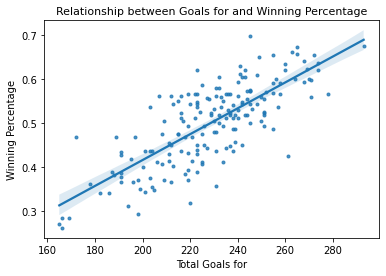

In [34]:
sns.regplot(x="goals_for", y="win_pct", data=nhl_team_reg_season_stats, marker=".")
plt.xlabel("Total Goals for")
plt.ylabel("Winning Percentage")
plt.title("Relationship between Goals for and Winning Percentage", fontsize=11)

6. Calculate the correlation coefficient between total number of goals for and winning percentage in the updated “NHL_Team_R_Stats” dataframe.



In [35]:
nhl_team_reg_season_stats["goals_for"].corr(nhl_team_reg_season_stats["win_pct"])

0.7706255321801442

7. Save dataframes as csv files. 
    - Name the updated “NHL_Game” dataframe as “NHL_Game2”.
    - Name the “NHL_Team_Stats” dataframe as “NHL_Team_Stats”.
    - Name the “NHL_Team_R_Stats” dataframe as “NHL_Team_R_Stats”.
    - Make sure to exclude the index as a column in the csv files.

In [36]:
nhl_game.to_csv("NHL_Game2.csv", index=False)
nhl_team_stats.to_csv("NHL_Team_Stats.csv", index=False)
nhl_team_reg_season_stats.to_csv("NHL_Team_R_Stats.csv", index=False)